Sensitivity Analysis of COAWST runs; part 2
(after we've run the model, to compute the Sobol indices)

Copy for runs 424-489 (with changes in wave conditions!)

In [1]:
import numpy as np
#import xarray as xr
import matplotlib.pyplot as plt
import equadratures as eq
import pandas as pd
import scipy as sp

The following is a "redo" of the setup code, just so we have the data here

In [2]:
order_parameters = 2 # note: when order_parameters = 3 it breaks because there's too much going on, I think

wave_height   = eq.Parameter(distribution='uniform', lower=0.001, upper=0.5, order=order_parameters)
wave_steepness   = eq.Parameter(distribution='uniform', lower=0.025, upper=0.055, order=order_parameters)
veg_density_powerscale   = eq.Parameter(distribution='uniform', lower=-0.3, upper=0.3, order=order_parameters)
veg_ht_powerscale   = eq.Parameter(distribution='uniform', lower=-0.3, upper=0.3, order=order_parameters)
veg_stem_powerscale   = eq.Parameter(distribution='uniform', lower=-0.3, upper=0.3, order=order_parameters)
start_location   = eq.Parameter(distribution='uniform', lower=-0.3, upper=0.3, order=order_parameters)
sediment_ws_power   = eq.Parameter(distribution='uniform', lower=-1.30103, upper=0.69897, order=order_parameters)
sediment_M_power   = eq.Parameter(distribution='uniform', lower=-5, upper=-4, order=order_parameters)
sediment_taucrit   = eq.Parameter(distribution='uniform', lower=0.01, upper=0.2, order=order_parameters)
sediment_supply_powerscale   = eq.Parameter(distribution='uniform', lower=-1, upper=1, order=order_parameters)
parameters = [wave_height,wave_steepness,veg_density_powerscale,veg_ht_powerscale,veg_stem_powerscale,start_location,sediment_ws_power,sediment_M_power,sediment_taucrit,sediment_supply_powerscale]

In [3]:
mybasis = eq.Basis('total-order')
mypoly  = eq.Poly(parameters, mybasis, method='least-squares',\
                  sampling_args={'mesh':'tensor-grid', 'subsampling-algorithm':'qr', 'sampling-ratio':1.0})

In [4]:
pts = mypoly.get_points()
mypoly.basis.cardinality

66

In [5]:
pts


array([[ 2.50500000e-01,  4.00000000e-02,  2.77555756e-16,
         2.77555756e-16,  2.77555756e-16,  2.77555756e-16,
        -3.01030000e-01, -4.50000000e+00,  1.05000000e-01,
         7.77156117e-16],
       [ 2.50500000e-01,  5.16189500e-02, -2.32379001e-01,
         2.77555756e-16,  2.77555756e-16,  2.77555756e-16,
        -3.01030000e-01, -4.50000000e+00,  3.14133164e-02,
         7.77156117e-16],
       [ 2.50500000e-01,  2.83810500e-02,  2.77555756e-16,
        -2.32379001e-01, -2.32379001e-01,  2.77555756e-16,
        -3.01030000e-01, -4.50000000e+00,  1.05000000e-01,
         7.77156117e-16],
       [ 2.50500000e-01,  4.00000000e-02,  2.77555756e-16,
         2.77555756e-16,  2.32379001e-01, -2.32379001e-01,
        -3.01030000e-01, -4.50000000e+00,  1.78586684e-01,
         7.77156117e-16],
       [ 2.50500000e-01,  4.00000000e-02,  2.32379001e-01,
         2.32379001e-01,  2.77555756e-16,  2.32379001e-01,
        -3.01030000e-01, -4.50000000e+00,  1.05000000e-01,
         7.

note: a quick spot check of these points makes them look good compared with "effectivequadratures_runs_v1.xlsx, page "equad_outputs""

next, load model outputs from matlab:

In [6]:
marsh_out= sp.io.loadmat('minmax_all_v2.mat')
marsh_out

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 29 13:47:08 2022',
 '__version__': '1.0',
 '__globals__': [],
 'BSS': array([[(array([[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
                 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
                 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
                 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
                 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
                 489]], dtype=uint16), array([[[0., 0., 0., ..., 0., 0., 0.],
                 [0., 0., 0., ..., 0., 0., 0.],
                 [0., 0., 0., ..., 0., 0., 0.],
                 ...,
                 [0., 0., 0., ..., 0., 0., 0.],
                 [0., 0., 0., ..., 0., 0., 0.],
                 [0., 0., 0., ..., 0., 0., 0.]],
 
                [[0., 0., 0., ..., 0., 0., 0.],
                 [0., 0., 0., ..., 0., 0., 0.],
    

In [9]:
marsh_out.keys()
BSS = marsh_out['BSS']
Dissip = marsh_out['Dissip']
Dep_Ero = marsh_out['Dep_Ero']
SedFlux = marsh_out['SedFlux']
Dissip.dtype

dtype([('run_num', 'O'), ('dissip_veg_5tc_marshflooded_allveg', 'O'), ('dissip_fric_5tc_marshflooded_allveg', 'O'), ('dissip_break_5tc_marshflooded_allveg', 'O'), ('dissip_wcap_5tc_marshflooded_allveg', 'O'), ('dissip_sum_5tc_marshflooded_allveg', 'O'), ('note', 'O'), ('units', 'O')])

In [10]:
run_num = BSS[0,0]['run_num']
run_num


array([[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
        437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
        450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489]], dtype=uint16)

In [11]:
# Dissip
dissip_veg_5tc_marshflooded_allveg = np.transpose(Dissip['dissip_veg_5tc_marshflooded_allveg'][0,0])
dissip_fric_5tc_marshflooded_allveg = np.transpose(Dissip['dissip_fric_5tc_marshflooded_allveg'][0,0])
dissip_break_5tc_marshflooded_allveg = np.transpose(Dissip['dissip_break_5tc_marshflooded_allveg'][0,0])
dissip_wcap_5tc_marshflooded_allveg = np.transpose(Dissip['dissip_wcap_5tc_marshflooded_allveg'][0,0])
dissip_sum_5tc_marshflooded_allveg = np.transpose(Dissip['dissip_sum_5tc_marshflooded_allveg'][0,0])



parameters = [wave_height,wave_steepness,veg_density_powerscale,veg_ht_powerscale,veg_stem_powerscale,start_location,sediment_ws_power,sediment_M_power,sediment_taucrit,sediment_supply_powerscale

In [12]:
si1storder_dissip = dict()
si2ndorder_dissip = dict()

In [13]:
mypoly.set_model(dissip_veg_5tc_marshflooded_allveg)
mean, var = mypoly.get_mean_and_variance()
print('Mean dissip_veg_5tc_marshflooded_allveg = %.2g' %(mean))
print('95%% confidence interval for dissip_veg_5tc_marshflooded_allveg = %.2g (%.2g%%)' %(1.96*np.sqrt(var),100*1.96*np.sqrt(var)/mean))
mypoly.get_sobol_indices(order=1)
mypoly.get_summary('SobolOut_DissipVeg.txt')

# save sobol outputs
si1 = mypoly.get_sobol_indices(order=1) # first order sobol indices
si1_v4 = list(si1.values()) # save the values as a list
si1_v4
si1_v5 = {'dissipveg_firstorder':si1_v4} # save the list as a new dictionary
si1storder_dissip.update(si1_v5)

si2 = mypoly.get_sobol_indices(order=2) # second order sobol indices
si2_v4 = list(si2.values()) # save the values as a list
si2_v4
si2_v5 = {'dissipveg_secondorder':si2_v4} # save the list as a new dictionary
si2ndorder_dissip.update(si2_v5)

Mean dissip_veg_5tc_marshflooded_allveg = 0.34
95% confidence interval for dissip_veg_5tc_marshflooded_allveg = 0.66 (1.9e+02%)


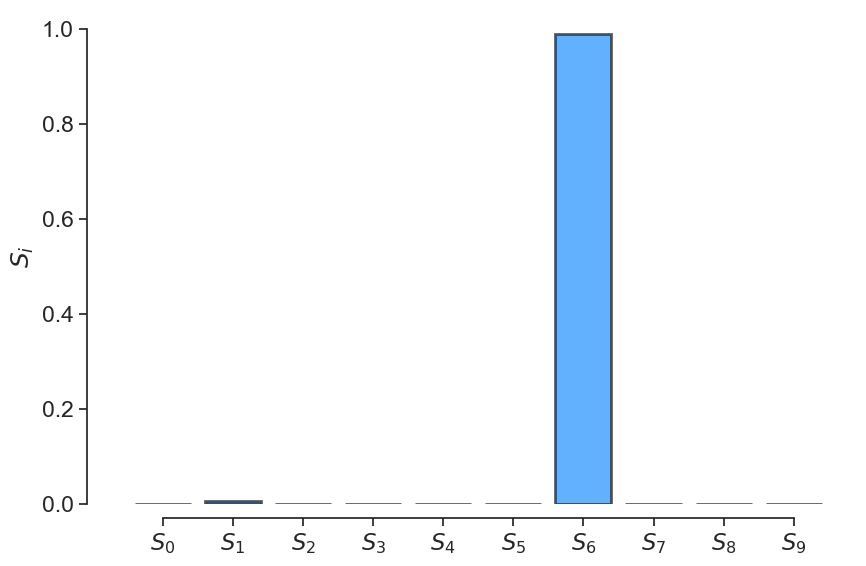

In [14]:
mypoly.plot_sobol()

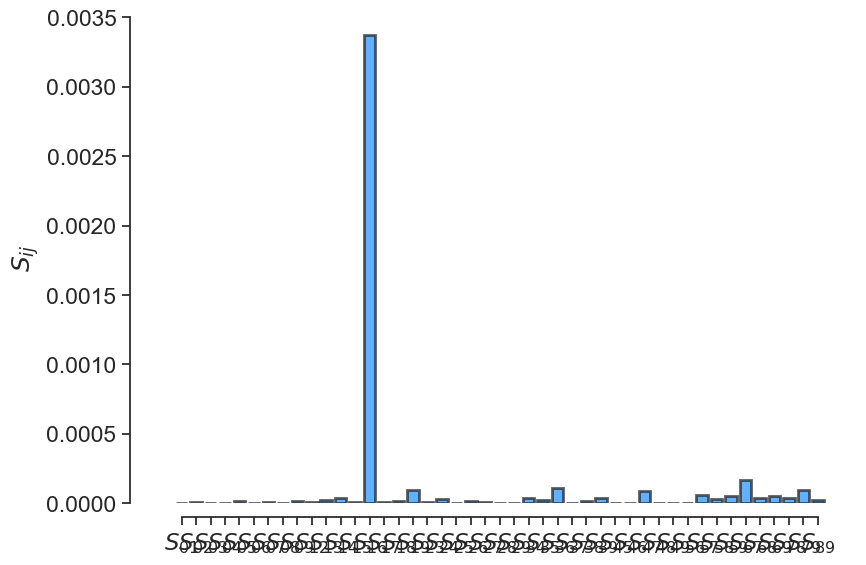

In [15]:
s2=mypoly.plot_sobol(order=2)

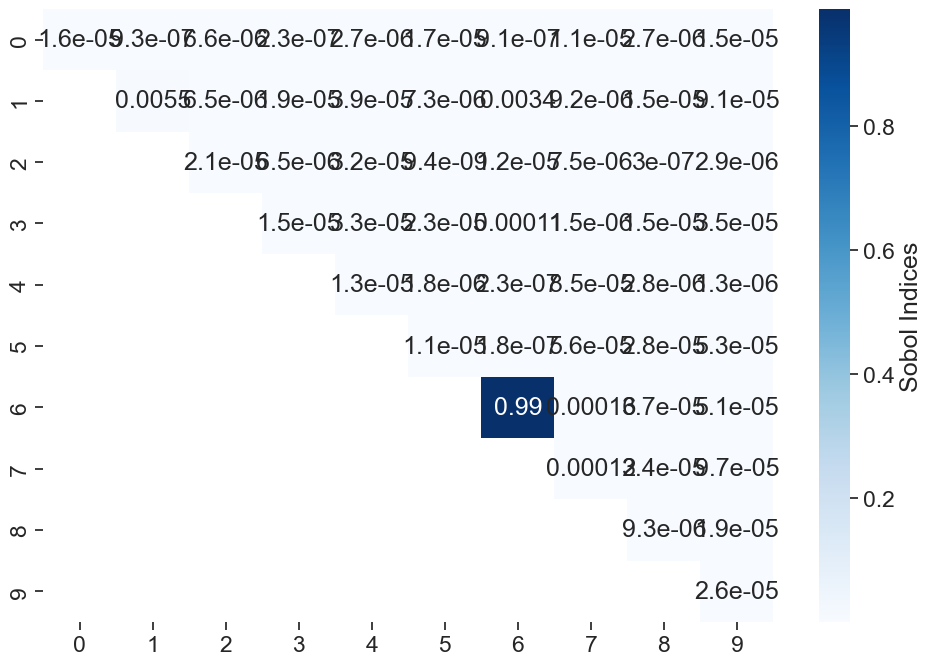

In [16]:
hm = mypoly.plot_sobol_heatmap(show=False)

In [17]:
hm[0].savefig('SobolHeatmap_DissipVeg.pdf',bbox_inches='tight',pad_inches=1)

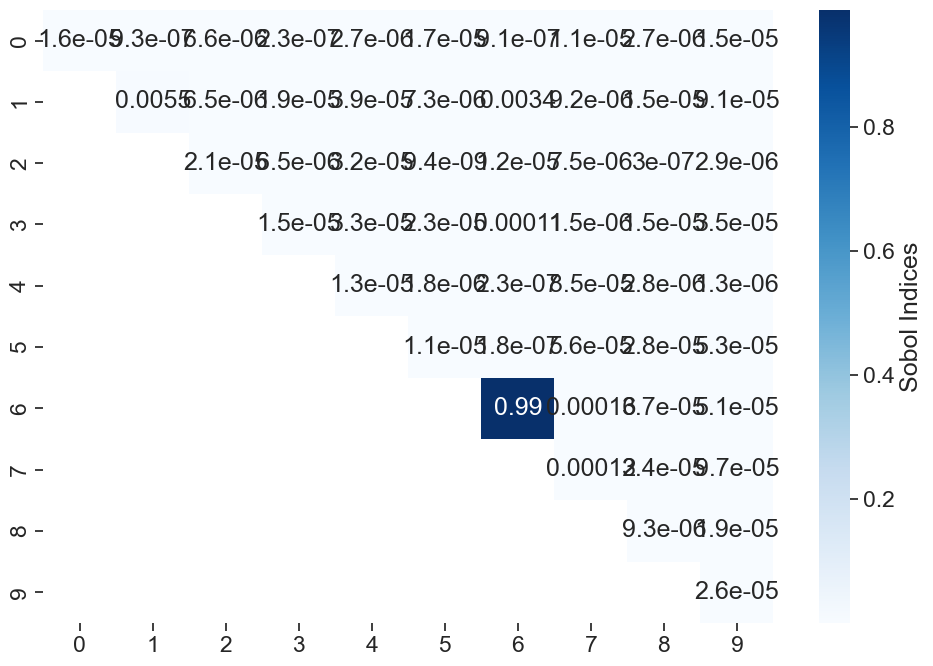

In [18]:
hm[0]

In [19]:
#dir(hm)
type(hm)

tuple

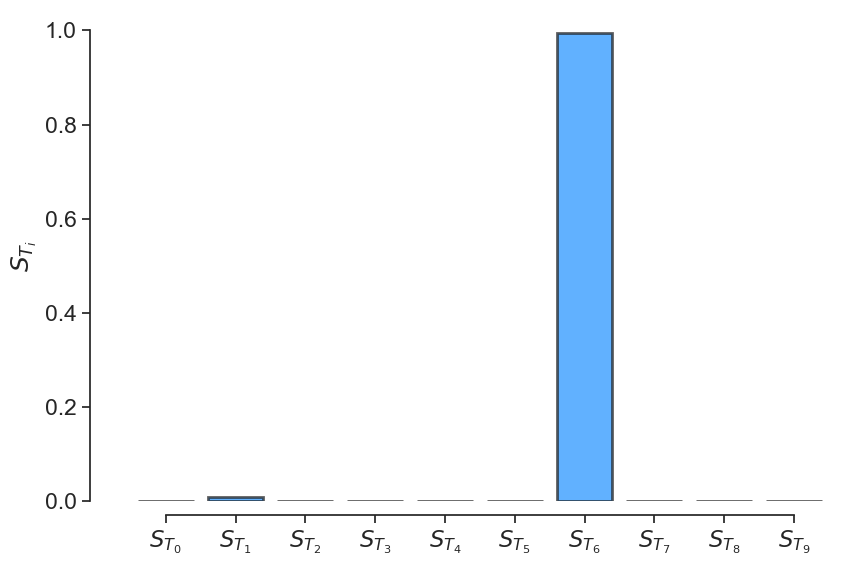

In [20]:
mypoly.plot_total_sobol()

for dissipation due to vegetation, the most important parameter is ... settling velocity?